In [2]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords

from numpy import array
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten
from keras.layers import GlobalMaxPooling1D
from keras.layers.embeddings import Embedding
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.layers import Dense, Flatten, Conv1D
import seaborn as sns

Using TensorFlow backend.


In [3]:
training_drop_na_df = pd.read_csv(r"C:\Users\jjtre\Documents\UCSD Coding Bootcamp Data Science\Final Project\testing_cleaned_tweets_stopword_filter_dropnan.csv", encoding='utf-8')
training_drop_na_df.head()

,tweet_polarity,tweet_text,clean_tweets
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",awww bummer shoulda got david carr third day
1,0,is upset that he can't update his Facebook by ...,upset update facebook texting might cry result...
2,0,@Kenichan I dived many times for the ball. Man...,dived many times ball managed save 50 rest go ...
3,0,my whole body feels itchy and like its on fire,whole body feels itchy like fire
4,0,"@nationwideclass no, it's not behaving at all....",behaving mad see


In [4]:
training_drop_na_df['tweet_polarity'].value_counts()

4    796299
0    796229
Name: tweet_polarity, dtype: int64

In [5]:
# make a smaller cut of dataframe to test... way to long to run the whole model
# try 25K neg and pos
neg_df = training_drop_na_df.iloc[0:796228] # first 450000K rows of dataframe
neg_df.head()

,tweet_polarity,tweet_text,clean_tweets
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",awww bummer shoulda got david carr third day
1,0,is upset that he can't update his Facebook by ...,upset update facebook texting might cry result...
2,0,@Kenichan I dived many times for the ball. Man...,dived many times ball managed save 50 rest go ...
3,0,my whole body feels itchy and like its on fire,whole body feels itchy like fire
4,0,"@nationwideclass no, it's not behaving at all....",behaving mad see


In [6]:
len(neg_df)

796228

In [7]:
# make a smaller cut of dataframe to test... way too long to run the whole model
# try 25K neg and pos
pos_df = training_drop_na_df.iloc[796229:1592528] # first 450000K rows of positive tweets
pos_df.head()

,tweet_polarity,tweet_text,clean_tweets
796229,4,I LOVE @Health4UandPets u guys r the best!!,love u guys r best
796230,4,im meeting up with one of my besties tonight! ...,im meeting one besties tonight cant wait girl ...
796231,4,"@DaRealSunisaKim Thanks for the Twitter add, S...",thanks twitter add sunisa got meet hin show dc...
796232,4,Being sick can be really cheap when it hurts t...,sick really cheap hurts much eat real food plu...
796233,4,@LovesBrooklyn2 he has that effect on everyone,effect everyone


In [8]:
len(pos_df)

796299

In [9]:
# join the two dataframes
join_neg_pos_df = pd.concat([neg_df, pos_df], ignore_index=True)
join_neg_pos_df.head()

,tweet_polarity,tweet_text,clean_tweets
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",awww bummer shoulda got david carr third day
1,0,is upset that he can't update his Facebook by ...,upset update facebook texting might cry result...
2,0,@Kenichan I dived many times for the ball. Man...,dived many times ball managed save 50 rest go ...
3,0,my whole body feels itchy and like its on fire,whole body feels itchy like fire
4,0,"@nationwideclass no, it's not behaving at all....",behaving mad see


In [10]:
print(len(join_neg_pos_df))

1592527


In [11]:
# Tokenizer to vectorize the text and convert it into sequence of integers after restricting the tokenizer to use only top most common 2000 words
tokenizer = Tokenizer(num_words=2000, filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',
                                   lower=True,split=' ')
tokenizer.fit_on_texts(join_neg_pos_df['clean_tweets'].values)

In [12]:
tokenizer

In [13]:
# pad_sequences to convert the sequences into 2-D numpy array
# padding just adds zeros to the end of list until it reaches the max length
# tweets are short so did not set a max length
X = tokenizer.texts_to_sequences(join_neg_pos_df['clean_tweets'].values)
X = pad_sequences(X)

In [14]:
# y values neg(0), pos(4) to 0, 1 one hot encoding
# 80/20 split
y = pd.get_dummies(join_neg_pos_df['tweet_polarity']).values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify=y)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(1274021, 91) (1274021, 2)
(318506, 91) (318506, 2)


In [15]:
## make a convolutional neural network (CNN)

embed_dim = 128
lstm_out = 196 

model = Sequential()
model.add(Embedding(2000, embed_dim, input_length = X.shape[1])) #  embed_dim, dropout = 0.2
#model.add(SpatialDropout1D(0.2))
#model.add(Flatten())

model.add(Conv1D(128, 5, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(2, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
print(model.summary())

W0926 01:29:28.151507 23872 deprecation_wrapper.py:119] From C:\Users\jjtre\Anaconda3\envs\PythonData\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0926 01:29:28.189409 23872 deprecation_wrapper.py:119] From C:\Users\jjtre\Anaconda3\envs\PythonData\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0926 01:29:28.197385 23872 deprecation_wrapper.py:119] From C:\Users\jjtre\Anaconda3\envs\PythonData\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0926 01:29:28.314075 23872 deprecation_wrapper.py:119] From C:\Users\jjtre\Anaconda3\envs\PythonData\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0926 01:29:28.3

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 91, 128)           256000    
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 87, 128)           82048     
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 258       
Total params: 338,306
Trainable params: 338,306
Non-trainable params: 0
_________________________________________________________________
None


In [16]:
history = model.fit(X_train, y_train, batch_size=128, epochs=2, verbose=1, validation_split=0.2)

score = model.evaluate(X_test, y_test, verbose=1)

W0926 01:29:28.925441 23872 deprecation_wrapper.py:119] From C:\Users\jjtre\Anaconda3\envs\PythonData\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 1019216 samples, validate on 254805 samples
Epoch 1/2
1019216/1019216 [==============================] - 950s 932us/step - loss: 0.4930 - acc: 0.7582 - val_loss: 0.4818 - val_acc: 0.7665
Epoch 2/2
318506/318506 [==============================] - 84s 265us/step


In [17]:
score, acc = model.evaluate(X_test, y_test, verbose = 2, batch_size = 128)
print("Score: %.2f" % (score))
print("Validation Accuracy: %.5f" % (acc))

Score: 0.48
Validation Accuracy: 0.76742


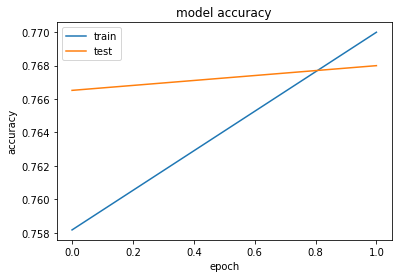

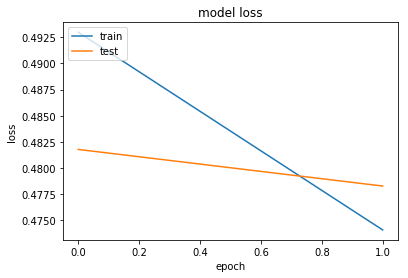

In [18]:
import matplotlib.pyplot as plt

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'upper left')
plt.show()

In [19]:
# Save the model
model.save("twitter_CNN_all.h5")